In [2]:
# Python implementation of TAS-20, EQ-60, SQ-R, AEQ, AEQr, IRI (EC, FS, PD, PT)

# Simplified question sets (for demonstration; replace with actual items from official sources)
tas20_questions = [
    "I am often confused about what emotion I am feeling.",
    "It is difficult for me to find the right words for my feelings.",
    "I have physical sensations that even doctors don’t understand.",
    "I am able to descri3"
    "be my feelings easily.",  # Reverse-scored
    "I prefer to analyze problems rather than just describe them."
]

eq60_questions = [
    "I can easily tell if someone else wants to enter a conversation.",
    "I find it hard to know what to do in a social situation.",
    "I often find it difficult to judge if something is rude or polite.",
    "I can tune into how someone else feels rapidly and intuitively.",
    "I am good at predicting how someone will feel."
]

sqr_questions = [
    "I find it easy to understand how machines work.",
    "I enjoy organizing things into categories.",
    "I am not very good at figuring out how systems operate.",
    "I like to plan things carefully before doing them.",
    "I find it hard to see patterns in data."
]

iri_questions = {
    "EC": [  # Emotional Concern
        "I often feel sorry for people who are less fortunate than me.",
        "I feel sad when I see someone crying."
    ],
    "FS": [  # Fantasy
        "I get caught up in the characters when reading a novel.",
        "I can imagine myself in someone else’s situation easily."
    ],
    "PD": [  # Personal Distress
        "I feel nervous when I see someone in danger.",
        "I get upset easily in stressful situations."
    ],
    "PT": [  # Perspective Taking
        "I try to look at everybody’s side of a disagreement.",
        "I can see things from someone else’s point of view."
    ]
}

# Function to collect responses for a single question
def get_response(question):
    while True:
        try:
            response = int(input(f"{question}: (1 = Strongly disagree, 5 = Strongly agree) "))
            if 1 <= response <= 5:
                return response
            else:
                print("Please enter a number between 1 and 5.")
        except ValueError:
            print("Invalid input. Please enter a number.")

# Function to administer a test and calculate its score
def administer_test(test_name, questions, reverse_scored_indices=None):
    if reverse_scored_indices is None:
        reverse_scored_indices = []
    print(f"\n--- {test_name} ---")
    print("Rate each statement from 1 to 5:")
    responses = []
    for i, q in enumerate(questions):
        response = get_response(q)
        # Reverse scoring if applicable
        if i in reverse_scored_indices:
            response = 6 - response  # Reverse: 1->5, 2->4, 3->3, 4->2, 5->1
        responses.append(response)
    total_score = sum(responses)
    print(f"Your {test_name} score is: {total_score}")
    return total_score

# Function to administer IRI (with subscales)
def administer_iri():
    print("\n--- Interpersonal Reactivity Index (IRI) ---")
    subscale_scores = {}
    for subscale, questions in iri_questions.items():
        print(f"\nSubscale: {subscale}")
        responses = [get_response(q) for q in questions]
        subscale_scores[subscale] = sum(responses)
        print(f"Your {subscale} score is: {subscale_scores[subscale]}")
    total_iri_score = sum(subscale_scores.values())
    print(f"Your total IRI score is: {total_iri_score}")
    return subscale_scores, total_iri_score

# Main function to run all tests
def run_all_tests():
    # TAS-20 (reverse-scored item: index 3)
    tas20_score = administer_test("TAS-20 (Toronto Alexithymia Scale)", tas20_questions, reverse_scored_indices=[3])
    
    # EQ-60
    eq60_score = administer_test("EQ-60 (Empathy Quotient)", eq60_questions)
    
    # SQ-R
    sqr_score = administer_test("SQ-R (Systemizing Quotient Revised)", sqr_questions)
    
    # AEQ (Applied Empathy Quotient: EQ-60 - SQ-R)
    aeq_score = eq60_score - sqr_score
    print(f"\nYour AEQ (Applied Empathy Quotient) score is: {aeq_score}")
    
    # AEQr (Applied Empathy Quotient Ratio: EQ-60 / SQ-R)
    aeqr_score = eq60_score / sqr_score if sqr_score != 0 else 0
    print(f"Your AEQr (Applied Empathy Quotient Ratio) is: {aeqr_score:.2f}")
    
    # IRI and its subscales
    iri_subscale_scores, iri_total_score = administer_iri()

# Run the tests
if __name__ == "__main__":
    run_all_tests()


--- EQ-60 (Empathy Quotient) ---
Rate each statement from 1 to 5:
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please enter a number.
Invalid input. Please

In [4]:
pip install textBlob

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 27.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk

# Download commonly needed packages
nltk.download('punkt')        # For tokenization
nltk.download('stopwords')    # For stopword removal
nltk.download('wordnet')      # For lemmatization
nltk.download('omw-1.4')      # WordNet data


[nltk_data] Downloading package punkt to /Users/ritikojha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ritikojha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ritikojha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ritikojha/nltk_data...


True

In [7]:
nltk.download('averaged_perceptron_tagger')  # For POS tagging
nltk.download('vader_lexicon')               # For sentiment analysis


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ritikojha/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ritikojha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import re

# Download required NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define keyword lists for each test (simplified; expand with domain expertise)
tas20_keywords = ['feel', 'emotion', 'confused', 'describe', 'understand']  # Emotional awareness
eq60_keywords = ['sorry', 'understand', 'care', 'help', 'empathize']  # Empathy
sqr_keywords = ['system', 'organize', 'pattern', 'structure', 'analyze']  # Systemizing
iri_ec_keywords = ['sorry', 'concern', 'sad', 'happy']  # Emotional Concern
iri_fs_keywords = ['imagine', 'story', 'character', 'dream']  # Fantasy
iri_pd_keywords = ['nervous', 'upset', 'distress', 'withdraw']  # Personal Distress
iri_pt_keywords = ['perspective', 'viewpoint', 'consider', 'understand']  # Perspective Taking

# Preprocess text
def preprocess_text(text):
    """
    Clean and preprocess conversation text.
    Args:
        text (str): Raw conversation text.
    Returns:
        str: Preprocessed text.
    """
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize and convert to lowercase
    tokens = word_tokenize(text.lower())
    # Remove stop words
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

# Sentiment analysis using VADER
def get_sentiment(text):
    """
    Calculate sentiment score using VADER.
    Args:
        text (str): Preprocessed text.
    Returns:
        float: Compound sentiment score (-1 to 1).
    """
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)['compound']

# Keyword-based scoring
def count_keywords(text, keywords):
    """
    Count occurrences of keywords in text.
    Args:
        text (str): Preprocessed text.
        keywords (list): List of relevant keywords.
    Returns:
        int: Number of keyword matches.
    """
    return sum(1 for word in text.split() if word in keywords)

# Calculate metric for a specific test
def calculate_test_metric(text, keywords, sentiment_weight=0.5, keyword_weight=0.5):
    """
    Estimate a test score based on sentiment and keyword presence.
    Args:
        text (str): Preprocessed text.
        keywords (list): Keywords for the test.
        sentiment_weight (float): Weight for sentiment score.
        keyword_weight (float): Weight for keyword count.
    Returns:
        float: Normalized score (0-100 for simplicity).
    """
    sentiment = get_sentiment(text)
    # Normalize sentiment to 0-1
    normalized_sentiment = (sentiment + 1) / 2
    keyword_count = count_keywords(text, keywords)
    # Normalize keyword count (assume max 10 keywords for simplicity)
    normalized_keywords = min(keyword_count / 10, 1)
    # Combine scores
    score = (sentiment_weight * normalized_sentiment + keyword_weight * normalized_keywords) * 100
    return round(score, 2)

# Main function to calculate all metrics
def calculate_psych_metrics(conversation):
    """
    Calculate metrics for TAS-20, EQ-60, SQ-R, AEQ, AEQr, IRI (EC, FS, PD, PT).
    Args:
        conversation (str): Client conversation text.
    Returns:
        dict: Dictionary of metric scores.
    """
    # Preprocess conversation
    # processed_text = preprocess_text(conversation)
    processed_text = conversation
    
    # Calculate individual test scores
    results = {
        'TAS-20': calculate_test_metric(processed_text, tas20_keywords),
        'EQ-60': calculate_test_metric(processed_text, eq60_keywords),
        'SQ-R': calculate_test_metric(processed_text, sqr_keywords),
        'IRI_EC': calculate_test_metric(processed_text, iri_ec_keywords),
        'IRI_FS': calculate_test_metric(processed_text, iri_fs_keywords),
        'IRI_PD': calculate_test_metric(processed_text, iri_pd_keywords),
        'IRI_PT': calculate_test_metric(processed_text, iri_pt_keywords)
    }
    
    # Calculate IRI total (average of subscales)
    results['IRI'] = round(sum([results[f'IRI_{sub}'] for sub in ['EC', 'FS', 'PD', 'PT']]) / 4, 2)
    
    # Calculate AEQ (EQ-60 - SQ-R)
    results['AEQ'] = round(results['EQ-60'] - results['SQ-R'], 2)
    
    # Calculate AEQr (EQ-60 / SQ-R)
    results['AEQr'] = round(results['EQ-60'] / results['SQ-R'], 2) if results['SQ-R'] != 0 else 0
    
    return results

# Example usage
conversation = """
I'm really upset about the service delay. I understand it must be tough for you too.
I'm sorry you're frustrated, let me help fix this. We need to organize the process better.
I can see your perspective, and I feel bad about the inconvenience.
"""

# Calculate metrics
metrics = calculate_psych_metrics(conversation)
for test, score in metrics.items():
    print(f"{test}: {score}")

TAS-20: 13.28
EQ-60: 18.28
SQ-R: 8.28
IRI_EC: 8.28
IRI_FS: 3.28
IRI_PD: 8.28
IRI_PT: 8.28
IRI: 7.03
AEQ: 10.0
AEQr: 2.21


[nltk_data] Downloading package punkt to /Users/ritikojha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ritikojha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ritikojha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import pandas as pd
res = pd.read_csv('kmeans_umap_result_distilbert_200k.csv')

In [4]:
res.head()

,output,input,conversation,kmeans_umap_cluster
0,i would love the chance to review the account ...,is the worst customer service,is the worst customer service i would love the...,0
1,h there we would definitely like to work with ...,yall lie about your great connection 5 bars lt...,yall lie about your great connection 5 bars lt...,2
2,we understand your concerns and we would like ...,since i signed up with yousince day 1,since i signed up with yousince day 1 we under...,0
3,this is saddening to hear please shoot us a dm...,you gonna magically change your connectivity f...,you gonna magically change your connectivity f...,0
4,please send me a private message so that i can...,whenever i contact customer support they tell ...,whenever i contact customer support they tell ...,2


Computing sentiment scores...
Sentiment scores added. DataFrame shape: (185457, 12)

Mean Sentiment Scores by Cluster:
 kmeans_umap_cluster  input_pos  input_neg  input_neu  input_compound  output_pos  output_neg  output_neu  output_compound
                   0   0.142635   0.085339   0.772027        0.065053    0.213483    0.034721    0.751794         0.352467
                   1   0.110338   0.069575   0.820087        0.094030    0.173002    0.048747    0.778249         0.275828
                   2   0.091521   0.088086   0.820392       -0.011508    0.165793    0.043166    0.791040         0.350586
                   3   0.080613   0.071966   0.847418        0.014012    0.146021    0.028983    0.824994         0.321661


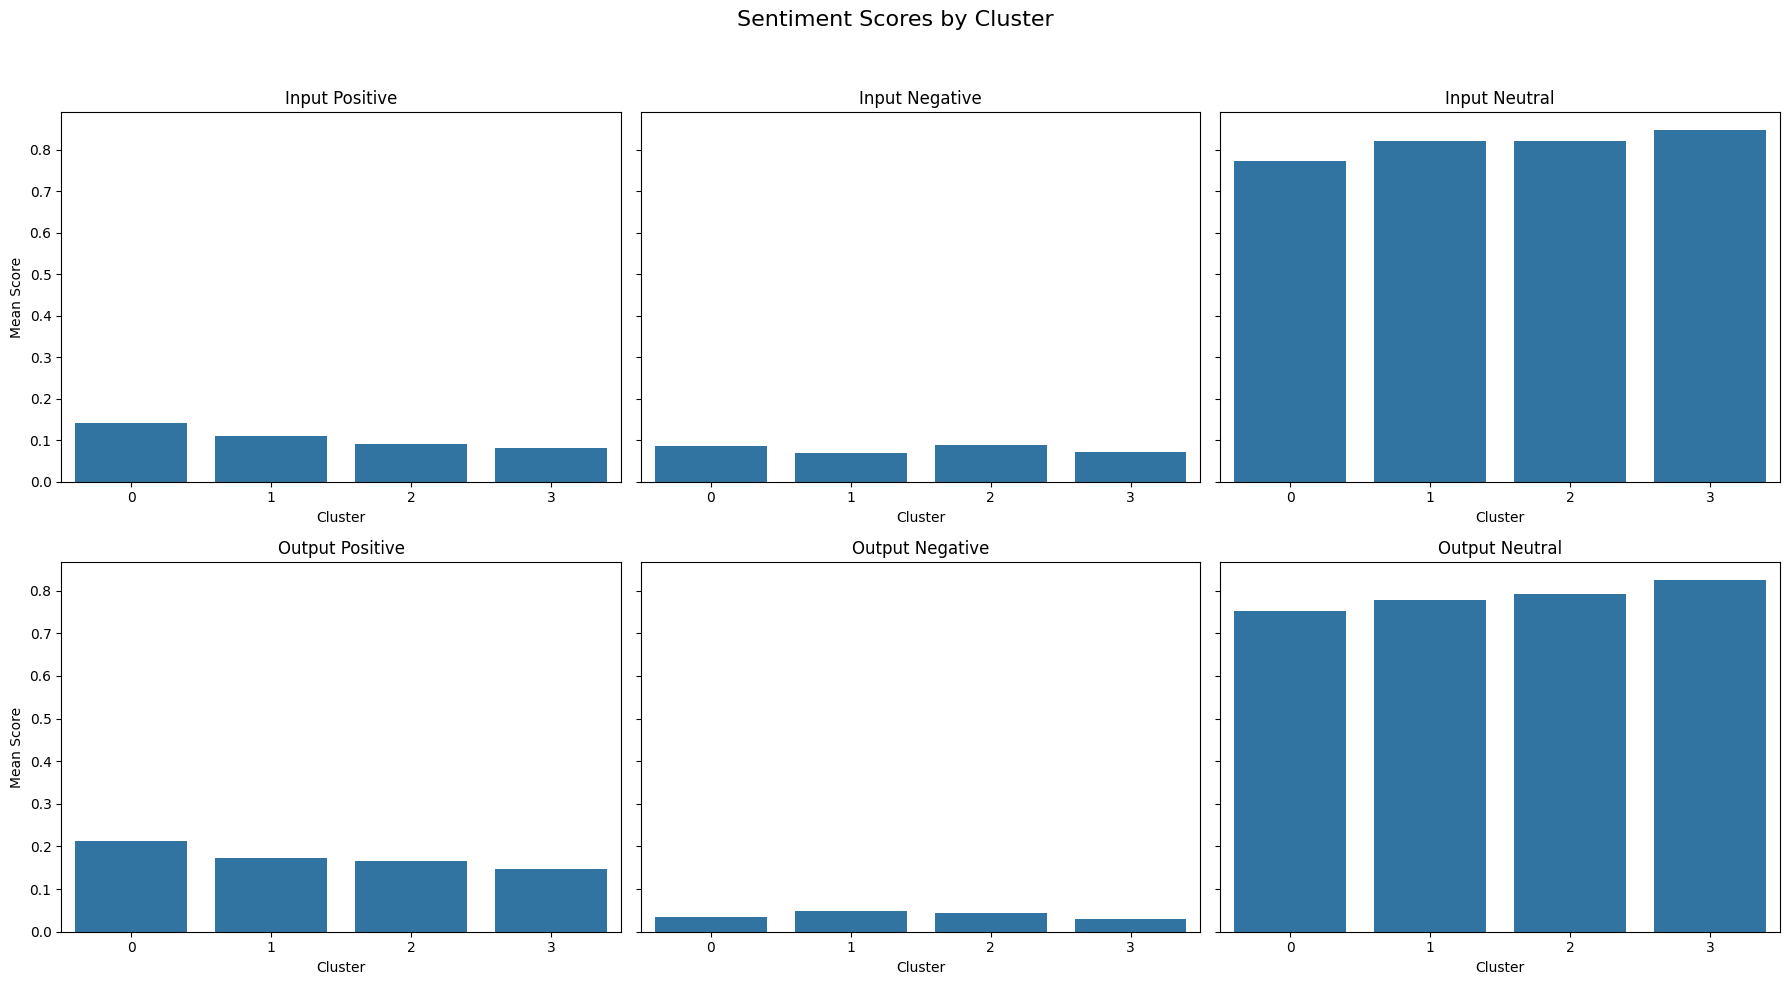


Interpretation of Sentiment Differences Across Clusters:

Cluster 0:
Input - Pos: 0.143, Neg: 0.085, Neu: 0.772
Output - Pos: 0.213, Neg: 0.035, Neu: 0.752

Cluster 1:
Input - Pos: 0.110, Neg: 0.070, Neu: 0.820
Output - Pos: 0.173, Neg: 0.049, Neu: 0.778

Cluster 2:
Input - Pos: 0.092, Neg: 0.088, Neu: 0.820
Output - Pos: 0.166, Neg: 0.043, Neu: 0.791

Cluster 3:
Input - Pos: 0.081, Neg: 0.072, Neu: 0.847
Output - Pos: 0.146, Neg: 0.029, Neu: 0.825


In [5]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming 'res' is your DataFrame
# If you need to load it from a file, uncomment and adjust the path:
# res = pd.read_csv('path_to_your_file.csv')

# Ensure input and output are strings and handle missing values
res['input'] = res['input'].astype(str).fillna('')
res['output'] = res['output'].astype(str).fillna('')

# Function to compute VADER sentiment scores
def get_vader_scores(text):
    """
    Compute VADER sentiment scores for a given text.
    Args:
        text (str): Input text.
    Returns:
        dict: Dictionary with pos, neg, neu, and compound scores.
    """
    scores = analyzer.polarity_scores(text)
    return {
        'pos': scores['pos'],
        'neg': scores['neg'],
        'neu': scores['neu'],
        'compound': scores['compound']
    }

# Apply VADER sentiment analysis to input and output
print("Computing sentiment scores...")
res['input_scores'] = res['input'].apply(get_vader_scores)
res['output_scores'] = res['output'].apply(get_vader_scores)

# Expand scores into separate columns
res['input_pos'] = res['input_scores'].apply(lambda x: x['pos'])
res['input_neg'] = res['input_scores'].apply(lambda x: x['neg'])
res['input_neu'] = res['input_scores'].apply(lambda x: x['neu'])
res['input_compound'] = res['input_scores'].apply(lambda x: x['compound'])

res['output_pos'] = res['output_scores'].apply(lambda x: x['pos'])
res['output_neg'] = res['output_scores'].apply(lambda x: x['neg'])
res['output_neu'] = res['output_scores'].apply(lambda x: x['neu'])
res['output_compound'] = res['output_scores'].apply(lambda x: x['compound'])

# Drop temporary score columns
res = res.drop(['input_scores', 'output_scores'], axis=1)

print("Sentiment scores added. DataFrame shape:", res.shape)

# Aggregate mean sentiment scores by cluster
cluster_sentiment = res.groupby('kmeans_umap_cluster').agg({
    'input_pos': 'mean',
    'input_neg': 'mean',
    'input_neu': 'mean',
    'input_compound': 'mean',
    'output_pos': 'mean',
    'output_neg': 'mean',
    'output_neu': 'mean',
    'output_compound': 'mean'
}).reset_index()

print("\nMean Sentiment Scores by Cluster:")
print(cluster_sentiment.to_string(index=False))

# Visualization: Bar plots for positive, negative, and neutral scores
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey='row')
fig.suptitle('Sentiment Scores by Cluster', fontsize=16)

# Input sentiment plots
sns.barplot(x='kmeans_umap_cluster', y='input_pos', data=cluster_sentiment, ax=axes[0, 0])
axes[0, 0].set_title('Input Positive')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Mean Score')

sns.barplot(x='kmeans_umap_cluster', y='input_neg', data=cluster_sentiment, ax=axes[0, 1])
axes[0, 1].set_title('Input Negative')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Mean Score')

sns.barplot(x='kmeans_umap_cluster', y='input_neu', data=cluster_sentiment, ax=axes[0, 2])
axes[0, 2].set_title('Input Neutral')
axes[0, 2].set_xlabel('Cluster')
axes[0, 2].set_ylabel('Mean Score')

# Output sentiment plots
sns.barplot(x='kmeans_umap_cluster', y='output_pos', data=cluster_sentiment, ax=axes[1, 0])
axes[1, 0].set_title('Output Positive')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Mean Score')

sns.barplot(x='kmeans_umap_cluster', y='output_neg', data=cluster_sentiment, ax=axes[1, 1])
axes[1, 1].set_title('Output Negative')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Mean Score')

sns.barplot(x='kmeans_umap_cluster', y='output_neu', data=cluster_sentiment, ax=axes[1, 2])
axes[1, 2].set_title('Output Neutral')
axes[1, 2].set_xlabel('Cluster')
axes[1, 2].set_ylabel('Mean Score')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Interpretation: Compare sentiment across clusters
print("\nInterpretation of Sentiment Differences Across Clusters:")
for cluster in cluster_sentiment['kmeans_umap_cluster']:
    cluster_data = cluster_sentiment[cluster_sentiment['kmeans_umap_cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Input - Pos: {cluster_data['input_pos'].values[0]:.3f}, "
          f"Neg: {cluster_data['input_neg'].values[0]:.3f}, "
          f"Neu: {cluster_data['input_neu'].values[0]:.3f}")
    print(f"Output - Pos: {cluster_data['output_pos'].values[0]:.3f}, "
          f"Neg: {cluster_data['output_neg'].values[0]:.3f}, "
          f"Neu: {cluster_data['output_neu'].values[0]:.3f}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ritikojha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   kmeans_umap_cluster  pos_input  neg_input  neu_input  compound_input  \
0                    0   0.149164   0.089827   0.760989        0.064920   
1                    1   0.114534   0.073078   0.812385        0.093592   
2                    2   0.097118   0.093083   0.809758       -0.010368   
3                    3   0.084980   0.076293   0.838702        0.013304   

   pos_output  neg_output  neu_output  compound_output  pos_delta  neg_delta  \
0    0.216787    0.039480    0.743732         0.345848   0.067624  -0.050347   
1    0.176311    0.051141    0.772549         0.272411   0.061776  -0.021937   
2    0.170112    0.045462    0.784423         0.348833   0.072994  -0.047622   
3    0.148943    0.030104    0.820954         0.321112   0.063963  -0.046189   

   neu_delta  compound_delta  
0  -0.017257        0.280928  
1  -0.039836        0.178818  
2  -0.025335        0.359201  
3  -0.017748        0.307807  


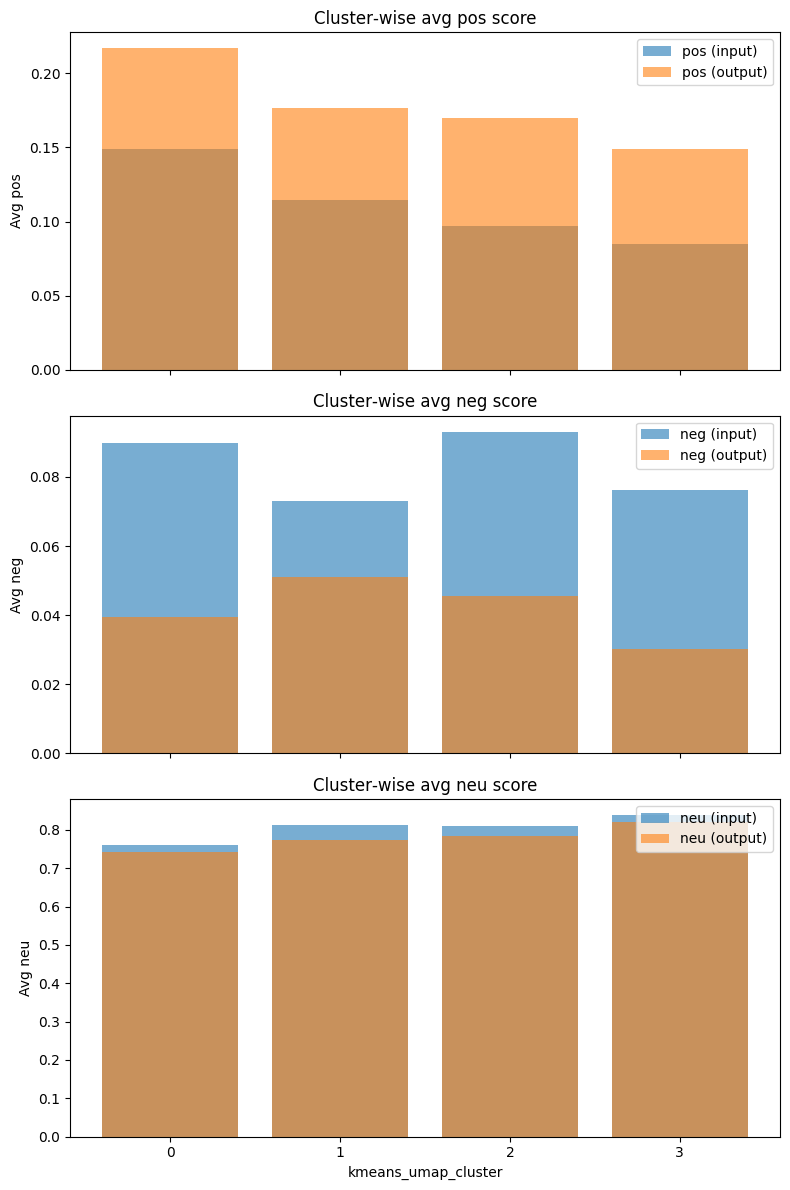

In [6]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# If you haven't already downloaded the VADER lexicon:
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Assume `res` is your DataFrame
# Example: res = pd.read_csv("your_data.csv")

# Define a function to get VADER scores
def get_vader_scores(text):
    if not isinstance(text, str) or not text.strip():
        return {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
    return sia.polarity_scores(text)

# Apply to `input`
input_scores = res['input'].apply(get_vader_scores).apply(pd.Series)
input_scores.columns = [f"{col}_input" for col in input_scores.columns]
res = pd.concat([res, input_scores], axis=1)

# Apply to `output`
output_scores = res['output'].apply(get_vader_scores).apply(pd.Series)
output_scores.columns = [f"{col}_output" for col in output_scores.columns]
res = pd.concat([res, output_scores], axis=1)

# Now compute cluster‐level sentiment averages
cluster_summary = res.groupby('kmeans_umap_cluster').agg({
    'pos_input':    'mean',
    'neg_input':    'mean',
    'neu_input':    'mean',
    'compound_input':'mean',
    'pos_output':   'mean',
    'neg_output':   'mean',
    'neu_output':   'mean',
    'compound_output':'mean',
}).reset_index()

# For easy comparison, you might compute deltas:
for mood in ['pos', 'neg', 'neu', 'compound']:
    cluster_summary[f"{mood}_delta"] = (
        cluster_summary[f"{mood}_output"] - cluster_summary[f"{mood}_input"]
    )

print(cluster_summary)

# (Optional) Visualize differences per cluster
import matplotlib.pyplot as plt

moods = ['pos', 'neg', 'neu']
x = cluster_summary['kmeans_umap_cluster'].astype(str)

fig, axes = plt.subplots(len(moods), 1, figsize=(8, 4*len(moods)), sharex=True)
for ax, mood in zip(axes, moods):
    ax.bar(x, cluster_summary[f"{mood}_input"], alpha=0.6, label=f"{mood} (input)")
    ax.bar(x, cluster_summary[f"{mood}_output"], alpha=0.6, label=f"{mood} (output)")
    ax.set_ylabel(f"Avg {mood}")
    ax.set_title(f"Cluster‐wise avg {mood} score")
    ax.legend()
    
plt.xlabel("kmeans_umap_cluster")
plt.tight_layout()
plt.show()



Computing sentiment scores...
Sentiment scores added. DataFrame shape: (185457, 20)

Mean Sentiment Scores by Cluster:
 kmeans_umap_cluster  input_pos  input_neg  input_neu  input_compound  output_pos  output_neg  output_neu  output_compound
                   0   0.142635   0.085339   0.772027        0.065053    0.213483    0.034721    0.751794         0.352467
                   1   0.110338   0.069575   0.820087        0.094030    0.173002    0.048747    0.778249         0.275828
                   2   0.091521   0.088086   0.820392       -0.011508    0.165793    0.043166    0.791040         0.350586
                   3   0.080613   0.071966   0.847418        0.014012    0.146021    0.028983    0.824994         0.321661


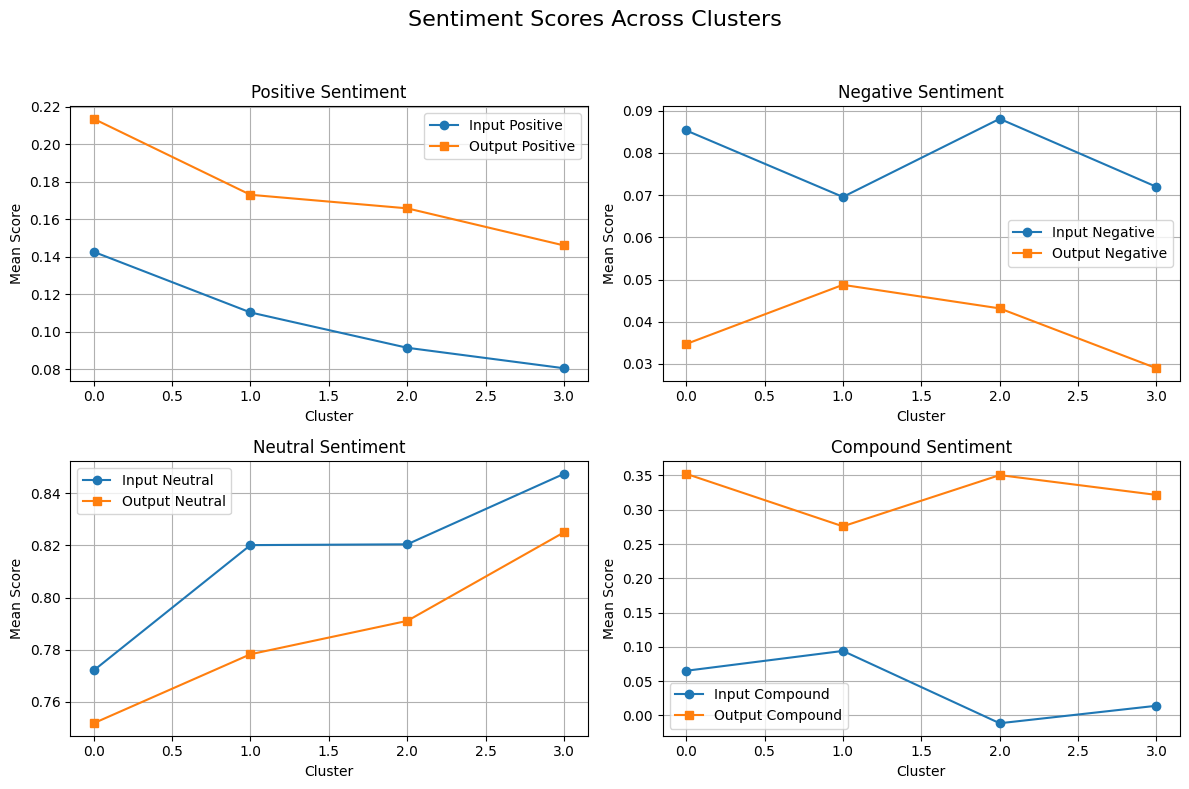

In [7]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming 'res' is your DataFrame
# If you need to load it from a file, uncomment and adjust the path:
# res = pd.read_csv('path_to_your_file.csv')

# Ensure input and output are strings and handle missing values
res['input'] = res['input'].astype(str).fillna('')
res['output'] = res['output'].astype(str).fillna('')

# Function to compute VADER sentiment scores
def get_vader_scores(text):
    """
    Compute VADER sentiment scores for a given text.
    Args:
        text (str): Input text.
    Returns:
        dict: Dictionary with pos, neg, neu, and compound scores.
    """
    scores = analyzer.polarity_scores(text)
    return {
        'pos': scores['pos'],
        'neg': scores['neg'],
        'neu': scores['neu'],
        'compound': scores['compound']
    }

# Apply VADER sentiment analysis to input and output
print("Computing sentiment scores...")
res['input_scores'] = res['input'].apply(get_vader_scores)
res['output_scores'] = res['output'].apply(get_vader_scores)

# Expand scores into separate columns
res['input_pos'] = res['input_scores'].apply(lambda x: x['pos'])
res['input_neg'] = res['input_scores'].apply(lambda x: x['neg'])
res['input_neu'] = res['input_scores'].apply(lambda x: x['neu'])
res['input_compound'] = res['input_scores'].apply(lambda x: x['compound'])

res['output_pos'] = res['output_scores'].apply(lambda x: x['pos'])
res['output_neg'] = res['output_scores'].apply(lambda x: x['neg'])
res['output_neu'] = res['output_scores'].apply(lambda x: x['neu'])
res['output_compound'] = res['output_scores'].apply(lambda x: x['compound'])

# Drop temporary score columns
res = res.drop(['input_scores', 'output_scores'], axis=1)

print("Sentiment scores added. DataFrame shape:", res.shape)

# Aggregate mean sentiment scores by cluster
cluster_sentiment = res.groupby('kmeans_umap_cluster').agg({
    'input_pos': 'mean',
    'input_neg': 'mean',
    'input_neu': 'mean',
    'input_compound': 'mean',
    'output_pos': 'mean',
    'output_neg': 'mean',
    'output_neu': 'mean',
    'output_compound': 'mean'
}).reset_index()

print("\nMean Sentiment Scores by Cluster:")
print(cluster_sentiment.to_string(index=False))

# Create line plots for each sentiment metric
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Sentiment Scores Across Clusters', fontsize=16)

# Positive Scores
axes[0, 0].plot(cluster_sentiment['kmeans_umap_cluster'], cluster_sentiment['input_pos'], 
                label='Input Positive', marker='o')
axes[0, 0].plot(cluster_sentiment['kmeans_umap_cluster'], cluster_sentiment['output_pos'], 
                label='Output Positive', marker='s')
axes[0, 0].set_title('Positive Sentiment')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Mean Score')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Negative Scores
axes[0, 1].plot(cluster_sentiment['kmeans_umap_cluster'], cluster_sentiment['input_neg'], 
                label='Input Negative', marker='o')
axes[0, 1].plot(cluster_sentiment['kmeans_umap_cluster'], cluster_sentiment['output_neg'], 
                label='Output Negative', marker='s')
axes[0, 1].set_title('Negative Sentiment')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Mean Score')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Neutral Scores
axes[1, 0].plot(cluster_sentiment['kmeans_umap_cluster'], cluster_sentiment['input_neu'], 
                label='Input Neutral', marker='o')
axes[1, 0].plot(cluster_sentiment['kmeans_umap_cluster'], cluster_sentiment['output_neu'], 
                label='Output Neutral', marker='s')
axes[1, 0].set_title('Neutral Sentiment')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Mean Score')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Compound Scores
axes[1, 1].plot(cluster_sentiment['kmeans_umap_cluster'], cluster_sentiment['input_compound'], 
                label='Input Compound', marker='o')
axes[1, 1].plot(cluster_sentiment['kmeans_umap_cluster'], cluster_sentiment['output_compound'], 
                label='Output Compound', marker='s')
axes[1, 1].set_title('Compound Sentiment')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Mean Score')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [8]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Setup pipelines
sentiment_pipe = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    return_all_scores=False
)
emotion_pipe = pipeline(
    "text-classification",
    model="bhadresh-savani/distilbert-base-uncased-emotion",
    return_all_scores=False
)

# 2) Ensure text columns exist
res['input']  = res['input'].astype(str).fillna('')
res['output'] = res['output'].astype(str).fillna('')

# 3) Apply sentiment pipeline
print("Scoring sentiment...")
res[['sent_label_in','sent_score_in']]  = pd.DataFrame(
    [sentiment_pipe(text)[0].values() for text in res['input']],
    index=res.index
)
res[['sent_label_out','sent_score_out']] = pd.DataFrame(
    [sentiment_pipe(text)[0].values() for text in res['output']],
    index=res.index
)

# 4) Apply emotion pipeline
print("Scoring emotion...")
res[['emo_label_in','emo_score_in']]  = pd.DataFrame(
    [emotion_pipe(text)[0].values() for text in res['input']],
    index=res.index
)
res[['emo_label_out','emo_score_out']] = pd.DataFrame(
    [emotion_pipe(text)[0].values() for text in res['output']],
    index=res.index
)

# 5) Aggregate by cluster
cluster_sent = (
    res
    .groupby('kmeans_umap_cluster')
    .agg(
        # average confidence
        sent_score_in=('sent_score_in','mean'),
        sent_score_out=('sent_score_out','mean'),
        emo_score_in=('emo_score_in','mean'),
        emo_score_out=('emo_score_out','mean'),
        # label proportions
        pos_in=('sent_label_in', lambda s: (s=='positive').mean()),
        neu_in=('sent_label_in', lambda s: (s=='neutral').mean()),
        neg_in=('sent_label_in', lambda s: (s=='negative').mean()),
        pos_out=('sent_label_out', lambda s: (s=='positive').mean()),
        neu_out=('sent_label_out', lambda s: (s=='neutral').mean()),
        neg_out=('sent_label_out', lambda s: (s=='negative').mean()),
    )
    .reset_index()
)

# 6) Plot sentiment proportions
plt.figure(figsize=(10,6))
modes = ['pos','neu','neg']
for i, mode in enumerate(modes,1):
    plt.subplot(3,1,i)
    plt.plot(cluster_sent['kmeans_umap_cluster'], cluster_sent[f'{mode}_in'],  '-o', label='Input')
    plt.plot(cluster_sent['kmeans_umap_cluster'], cluster_sent[f'{mode}_out'], '-s', label='Output')
    plt.ylabel(f'{mode.capitalize()} %')
    plt.legend()
    plt.grid(True)
plt.xlabel('Cluster')
plt.suptitle('Sentiment Label Proportions by Cluster')
plt.tight_layout(rect=[0,0,1,0.95])

# 7) Plot average confidence scores
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(cluster_sent['kmeans_umap_cluster'], cluster_sent['sent_score_in'],  '-o', label='Input')
ax[0].plot(cluster_sent['kmeans_umap_cluster'], cluster_sent['sent_score_out'], '-s', label='Output')
ax[0].set_title('Sentiment Confidence')
ax[0].set_xlabel('Cluster'); ax[0].set_ylabel('Mean Score'); ax[0].legend(); ax[0].grid(True)

ax[1].plot(cluster_sent['kmeans_umap_cluster'], cluster_sent['emo_score_in'],  '-o', label='Input')
ax[1].plot(cluster_sent['kmeans_umap_cluster'], cluster_sent['emo_score_out'], '-s', label='Output')
ax[1].set_title('Emotion Confidence')
ax[1].set_xlabel('Cluster'); ax[1].set_ylabel('Mean Score'); ax[1].legend(); ax[1].grid(True)

plt.tight_layout()
plt.show()


/Users/ritikojha/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Device set to use mps:0
/Users/ritikojha/Library/Python/3.9/lib/python/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use mps:0


Scoring sentiment...


KeyboardInterrupt: 

Device set to use cpu
/Users/ritikojha/Library/Python/3.9/lib/python/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Device set to use cpu


Scoring sentiment on GPU in batches…
Scoring emotion on GPU in batches…


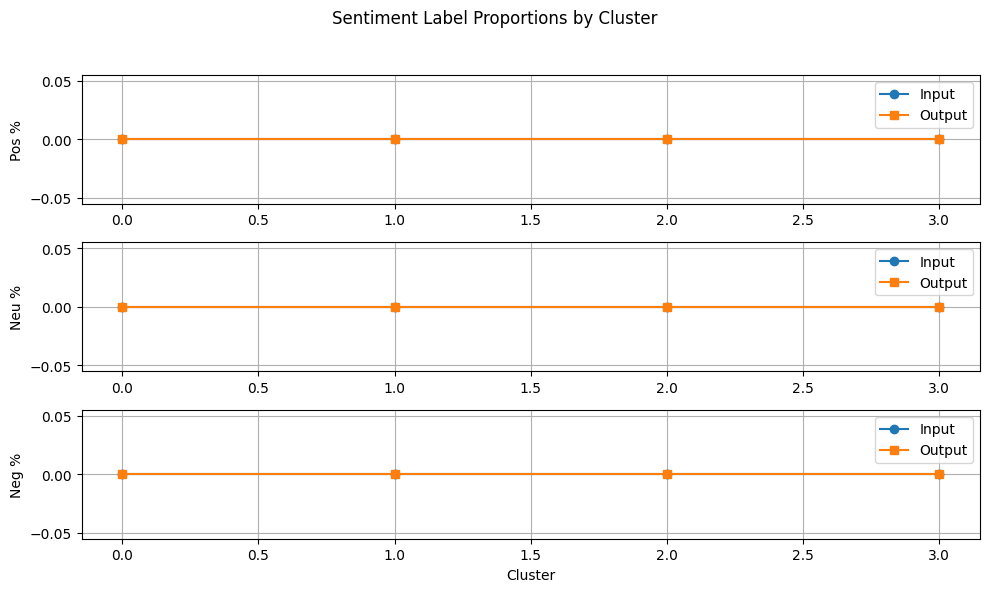

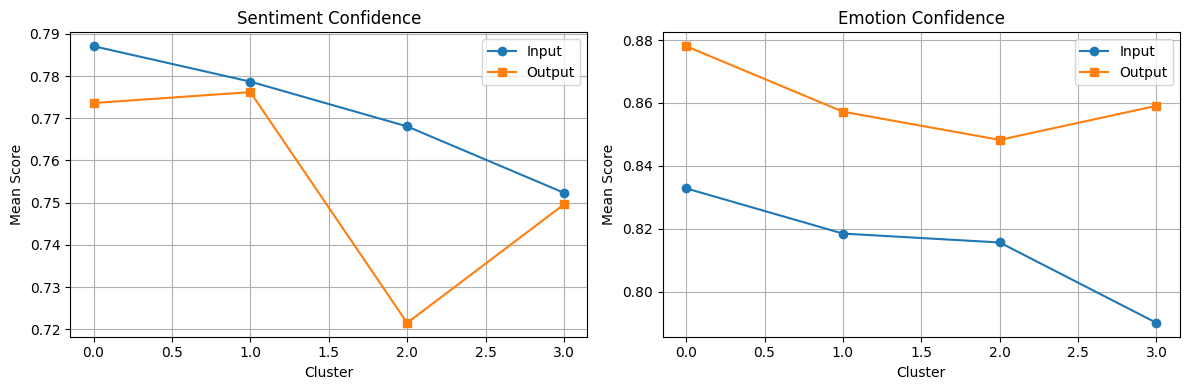

In [9]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# ──────────────────────────────────────────
# 1) Setup GPU‑enabled pipelines, batched
# ──────────────────────────────────────────
device = 0 if torch.cuda.is_available() else -1

sentiment_pipe = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    device=device,
    batch_size=32,
    return_all_scores=False
)

emotion_pipe = pipeline(
    "text-classification",
    model="bhadresh-savani/distilbert-base-uncased-emotion",
    device=device,
    batch_size=32,
    return_all_scores=False
)

# ──────────────────────────────────────────
# 2) Prepare your DataFrame
# ──────────────────────────────────────────
res['input']  = res['input'].astype(str).fillna('')
res['output'] = res['output'].astype(str).fillna('')

# ──────────────────────────────────────────
# 3) Batch‑process sentiment for input & output
# ──────────────────────────────────────────
print("Scoring sentiment on GPU in batches…")

# split into chunks of 32
def batched_pipe(pipe, texts, batch_size=32):
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i : i + batch_size]
        results.extend(pipe(batch))
    return results

# run sentiment
sent_in  = batched_pipe(sentiment_pipe, res['input'].tolist(),  batch_size=32)
sent_out = batched_pipe(sentiment_pipe, res['output'].tolist(), batch_size=32)

# unpack into DataFrame columns
res['sent_label_in']  = [r['label'] for r in sent_in]
res['sent_score_in']  = [r['score'] for r in sent_in]
res['sent_label_out'] = [r['label'] for r in sent_out]
res['sent_score_out'] = [r['score'] for r in sent_out]

# ──────────────────────────────────────────
# 4) Batch‑process emotion for input & output
# ──────────────────────────────────────────
print("Scoring emotion on GPU in batches…")

emo_in  = batched_pipe(emotion_pipe, res['input'].tolist(),  batch_size=32)
emo_out = batched_pipe(emotion_pipe, res['output'].tolist(), batch_size=32)

res['emo_label_in']  = [r['label'] for r in emo_in]
res['emo_score_in']  = [r['score'] for r in emo_in]
res['emo_label_out'] = [r['label'] for r in emo_out]
res['emo_score_out'] = [r['score'] for r in emo_out]

# ──────────────────────────────────────────
# 5) Aggregate by cluster
# ──────────────────────────────────────────
cluster_sent = (
    res
    .groupby('kmeans_umap_cluster')
    .agg(
        # sentiment confidence
        sent_score_in=('sent_score_in','mean'),
        sent_score_out=('sent_score_out','mean'),
        # emotion confidence
        emo_score_in=('emo_score_in','mean'),
        emo_score_out=('emo_score_out','mean'),
        # label proportions
        pos_in = ('sent_label_in',  lambda s: (s=='positive').mean()),
        neu_in = ('sent_label_in',  lambda s: (s=='neutral').mean()),
        neg_in = ('sent_label_in',  lambda s: (s=='negative').mean()),
        pos_out= ('sent_label_out', lambda s: (s=='positive').mean()),
        neu_out= ('sent_label_out', lambda s: (s=='neutral').mean()),
        neg_out= ('sent_label_out', lambda s: (s=='negative').mean()),
    )
    .reset_index()
)

# ──────────────────────────────────────────
# 6) Plotting
# ──────────────────────────────────────────

# A) Sentiment proportions
plt.figure(figsize=(10,6))
for i, mode in enumerate(['pos','neu','neg'], start=1):
    plt.subplot(3,1,i)
    plt.plot(cluster_sent['kmeans_umap_cluster'], cluster_sent[f'{mode}_in'],  '-o', label='Input')
    plt.plot(cluster_sent['kmeans_umap_cluster'], cluster_sent[f'{mode}_out'], '-s', label='Output')
    plt.ylabel(f'{mode.capitalize()} %'); plt.legend(); plt.grid(True)
plt.xlabel('Cluster')
plt.suptitle('Sentiment Label Proportions by Cluster')
plt.tight_layout(rect=[0,0,1,0.95])

# B) Confidence scores
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(cluster_sent['kmeans_umap_cluster'], cluster_sent['sent_score_in'],  '-o', label='Input')
ax[0].plot(cluster_sent['kmeans_umap_cluster'], cluster_sent['sent_score_out'], '-s', label='Output')
ax[0].set_title('Sentiment Confidence'); ax[0].set_xlabel('Cluster'); ax[0].set_ylabel('Mean Score'); ax[0].legend(); ax[0].grid(True)

ax[1].plot(cluster_sent['kmeans_umap_cluster'], cluster_sent['emo_score_in'],  '-o', label='Input')
ax[1].plot(cluster_sent['kmeans_umap_cluster'], cluster_sent['emo_score_out'], '-s', label='Output')
ax[1].set_title('Emotion Confidence'); ax[1].set_xlabel('Cluster'); ax[1].set_ylabel('Mean Score'); ax[1].legend(); ax[1].grid(True)

plt.tight_layout()
plt.show()
